In [1]:
#importing libraries
import pandas as pd
import numpy as np 
%matplotlib inline
import seaborn as sns 
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
#importing the data
df=pd.read_csv(r'C:\\Users\\strog\\Documents\\Google Dr Backup\\Google Dr Glasgow DA Master\\Final Project\\scripts\\subset_2class_agg.csv', 
                      sep=',')

In [3]:
df.head()

,Num_Acc,shock_point,severity,gender,journey_reason,secu_equipment,acc_hour,lighting,built_up_area,junction_type,atmospheric_cond,road_type,traffic_type,road_slope,road_shape,surface_state,acc_place_on_road,driver_age,speed
0,200500000001,front,light injury,male,home - work/school,belt - used,19,altered lighting conditions,built-up area,out of junction,normal,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,29,50.0
1,200500000001,side,hospitalised,female,leisury drive,belt - used,19,altered lighting conditions,built-up area,out of junction,normal,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,37,50.0
2,200500000009,front,light injury,male,home - work/school,belt - used,17,good lighting conditions,out of built-up area,X junction,cloudy weather,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,39,80.0
3,200500000009,side,hospitalised,male,leisury drive,belt - used,17,good lighting conditions,out of built-up area,X junction,cloudy weather,departmental road,bidirectional traffic,flat,straight-lined part,normal,on the lane,80,80.0
4,200500000011,front,no injury,male,leisury drive,belt - used,2,altered lighting conditions,out of built-up area,out of junction,normal,national road,bidirectional traffic,flat,straight-lined part,normal,on the lane,33,80.0


In [4]:
#showing main info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254887 entries, 0 to 254886
Data columns (total 19 columns):
Num_Acc              254887 non-null int64
shock_point          254887 non-null object
severity             254887 non-null object
gender               254887 non-null object
journey_reason       254887 non-null object
secu_equipment       254887 non-null object
acc_hour             254887 non-null int64
lighting             254887 non-null object
built_up_area        254887 non-null object
junction_type        254887 non-null object
atmospheric_cond     254887 non-null object
road_type            254887 non-null object
traffic_type         254887 non-null object
road_slope           254887 non-null object
road_shape           254887 non-null object
surface_state        254887 non-null object
acc_place_on_road    254887 non-null object
driver_age           254887 non-null int64
speed                254887 non-null float64
dtypes: float64(1), int64(3), object(15)
memory usage: 

In [5]:
#changing type to integer for speed variable
df.speed=df.speed.astype('int64')

In [6]:
#showing mean, standard deviation and percentiles
df.describe()

,Num_Acc,acc_hour,driver_age,speed
count,2.548870e+05,254887.000000,254887.000000,254887.000000
mean,2.010424e+11,14.055425,40.452553,66.952038
std,3.852347e+08,5.033674,16.636992,23.879765
min,2.005000e+11,1.000000,14.000000,50.000000
25%,2.007000e+11,10.000000,26.000000,50.000000
50%,2.010000e+11,15.000000,37.000000,50.000000
75%,2.014000e+11,18.000000,51.000000,80.000000
max,2.017001e+11,23.000000,95.000000,130.000000


# Variables distribution

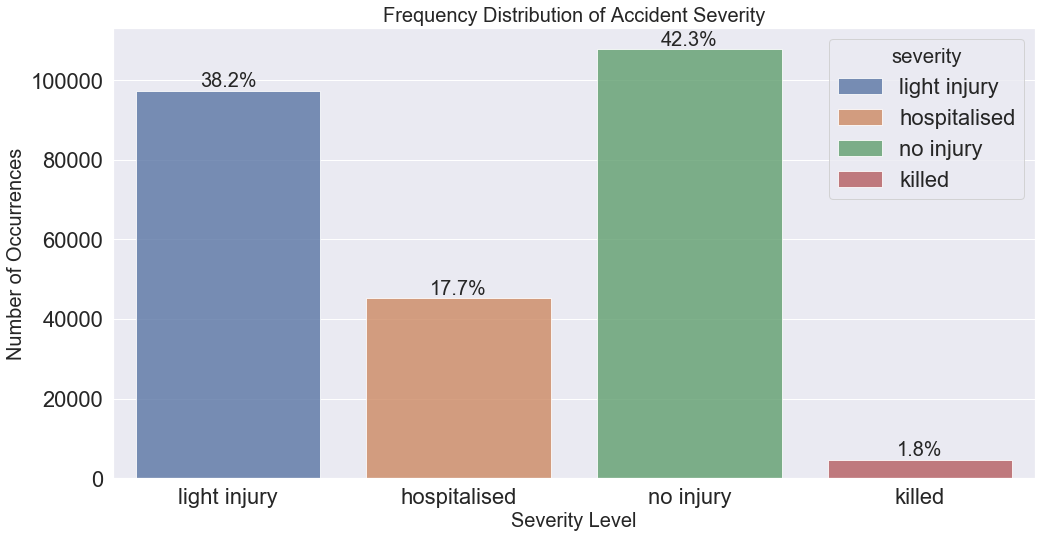

In [58]:
#plotting target variable distribution
sev_count = df['severity'].value_counts() 
sns.set(style="darkgrid", font_scale=1.5) 
total = float(len(df))
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
splot=sns.countplot(x='severity', hue='severity', data=df, alpha=0.8, dodge=False) 

for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    splot.annotate(percentage, (x, y),ha='center', va='bottom', fontsize=20)
plt.title('Frequency Distribution of Accident Severity', fontsize=20) 
plt.ylabel('Number of Occurrences', fontsize=20) 
plt.xlabel('Severity Level', fontsize=20) 
plt.tight_layout()
plt.show()

## Correlation between numerical features

,acc_hour,driver_age,speed
acc_hour,1.000000,-0.016867,-0.026403
driver_age,-0.016867,1.000000,0.036472
speed,-0.026403,0.036472,1.000000


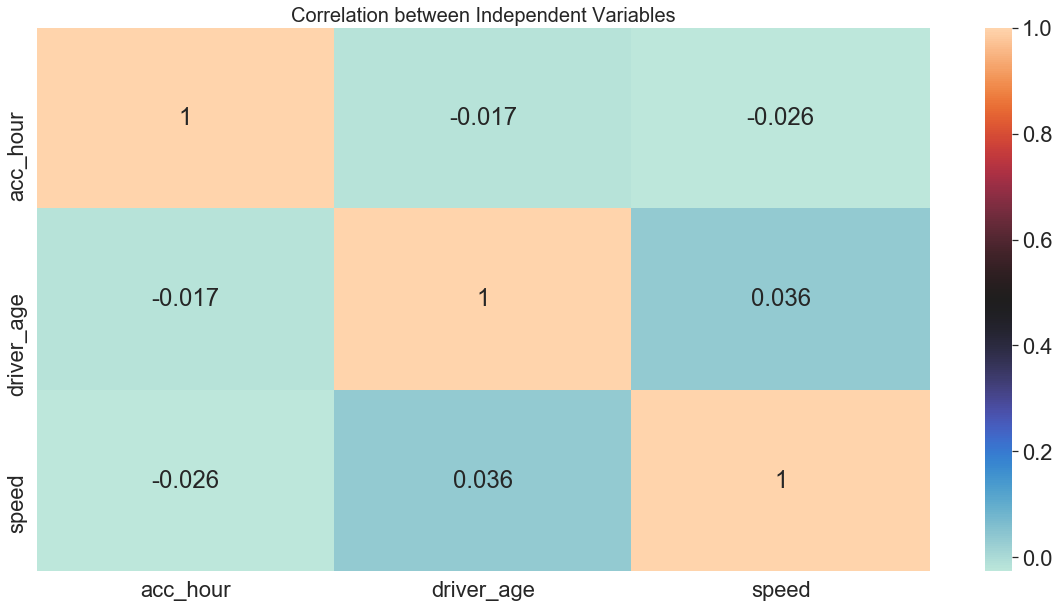

In [55]:
# plotting correlation between numerical features - no significant correlation between numerical variables
sns.set(font_scale=2)
plt.figure(figsize=(20,10)) 
c= df.drop('Num_Acc', axis=1).corr() 
sns.heatmap(c,cmap='icefire',annot=True)
plt.title('Correlation between Independent Variables', fontsize=20) 
c

## Association between numerical features and outcome variable

In [121]:
#function for visualising numerical variables vs. target variable
def num_target(var):
    for i in range(len(var)):
        fig, ax = plt.subplots()

        sns.kdeplot(df[df['severity']=='light injury'][var[i]], shade=True, color="orange", label='light injury', ax=ax)
        sns.kdeplot(df[df['severity']=='hospitalised'][var[i]], shade=True, color="green", label='hospitalised', ax=ax)
        sns.kdeplot(df[df['severity']=='no injury'][var[i]], shade=True, color="blue", label='no injury', ax=ax)
        sns.kdeplot(df[df['severity']=='killed'][var[i]], shade=True, color="red", label='killed', ax=ax)

        ax.set_xlabel(var[i])
        ax.set_ylabel("Density")

        fig.suptitle(var[i] + ' vs. Severity of the Accident');

In [122]:
df.severity.unique()

array(['light injury', 'hospitalised', 'no injury', 'killed'],
      dtype=object)

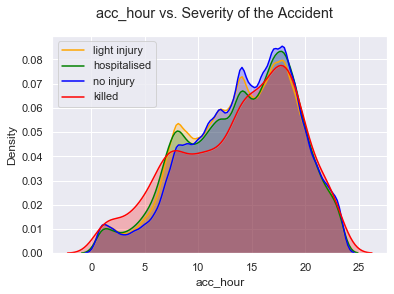

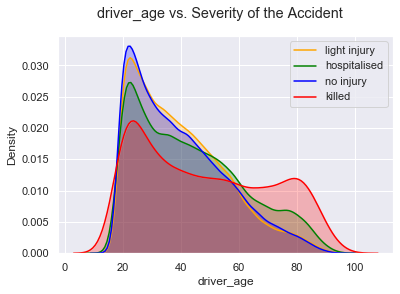

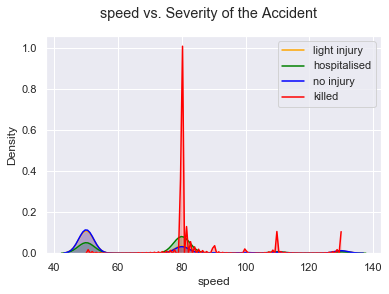

In [123]:
vat=list(df.select_dtypes(include='number').columns)
vat.remove('Num_Acc')
num_target(vat)

## Association between categorical features and target variable

In [32]:
#function to visualise categorical variables vs. target variable

def cat_target(var):
    for i in range(len(var)):
        fig, ax = plt.subplots()

        sns.set_palette("RdBu")

        sns.catplot('severity', hue=var[i], data=df, kind="count", sharey=False, ax=ax)

        plt.close(2) # catplot creates an extra figure we don't need
        
        ax.legend(title=var[i])
        ax.set_xticklabels(df.severity.unique())
        ax.set_xlabel("")

        fig.suptitle(var[i]+ ' vs. Severity of the Accident');

C:\Users\strog\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


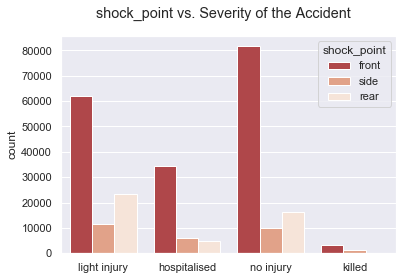

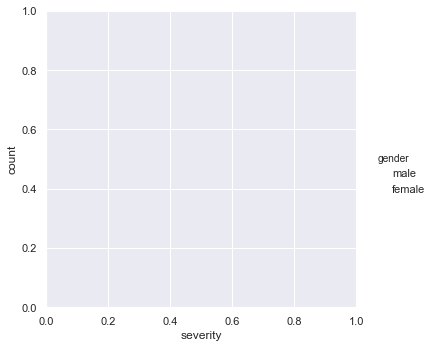

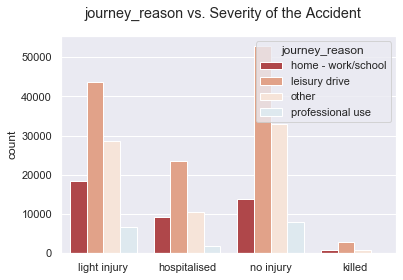

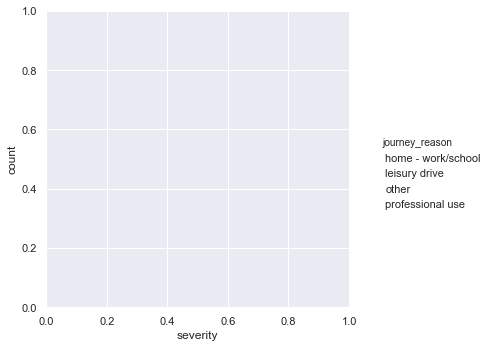

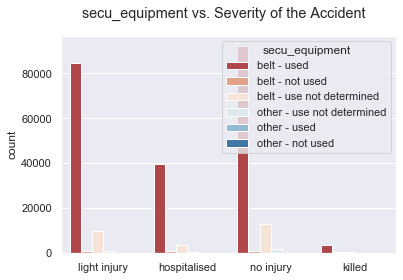

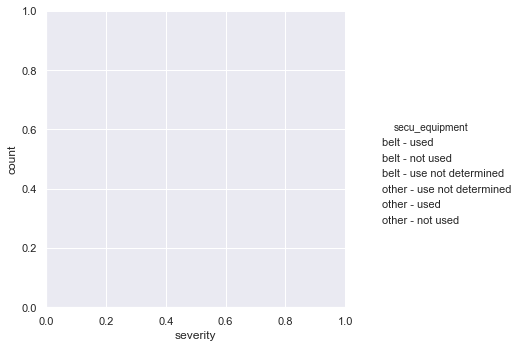

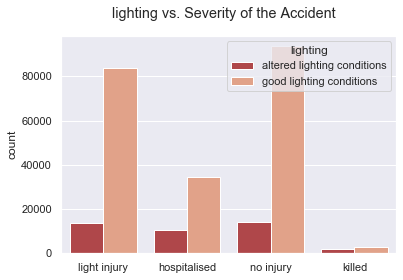

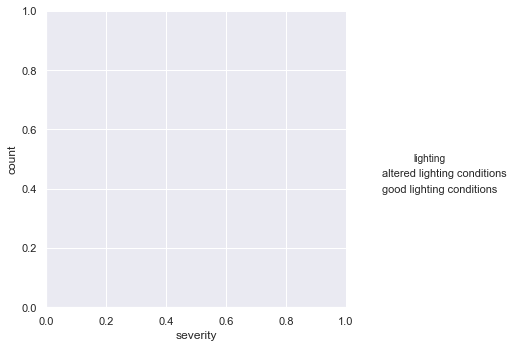

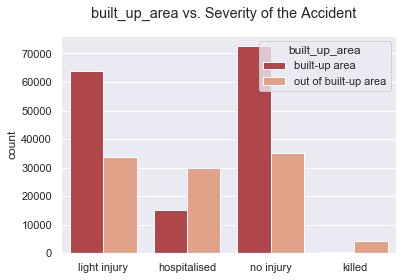

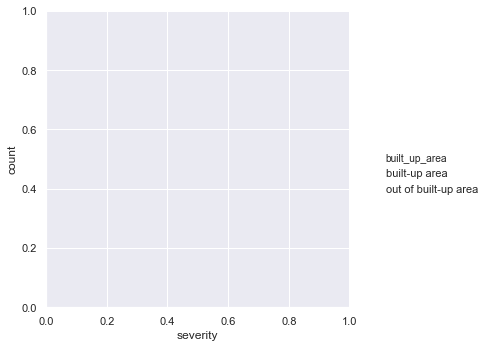

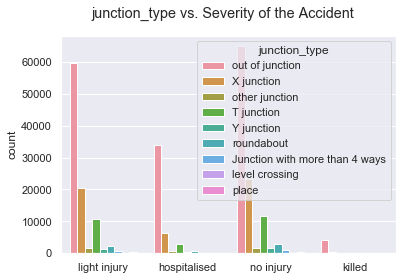

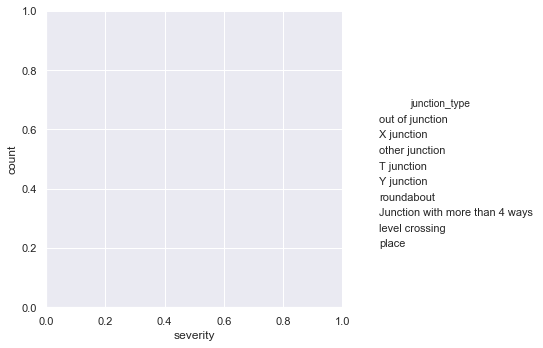

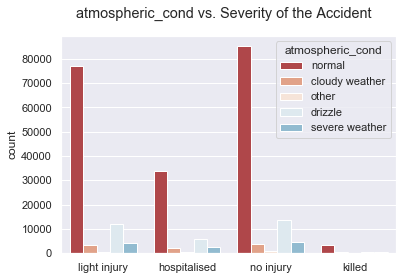

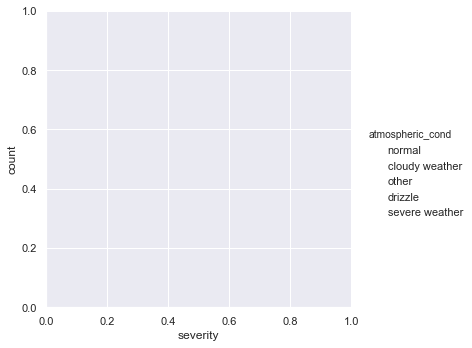

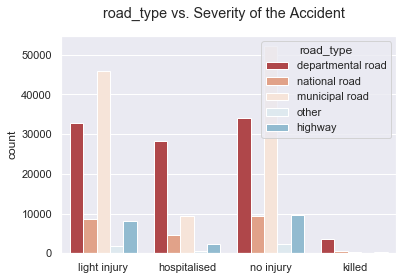

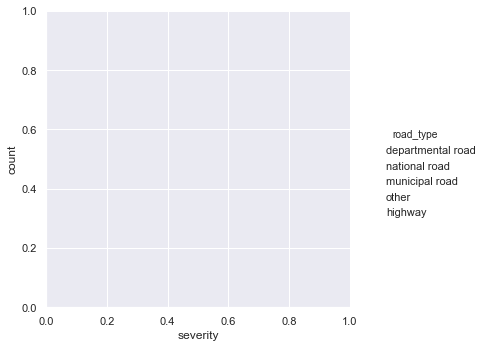

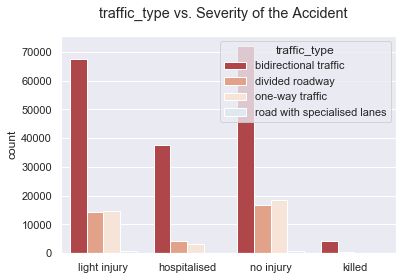

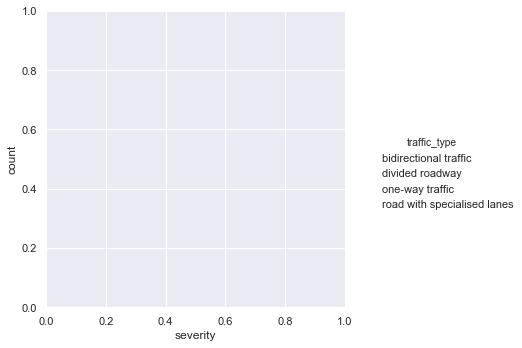

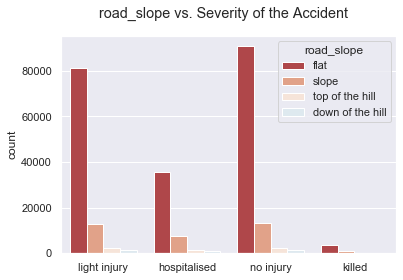

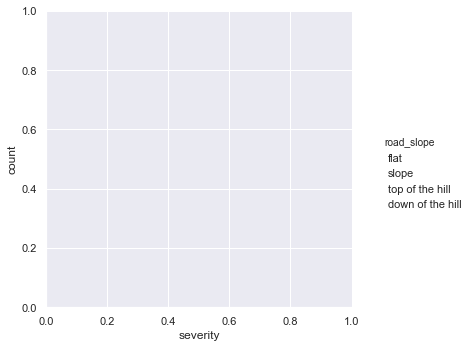

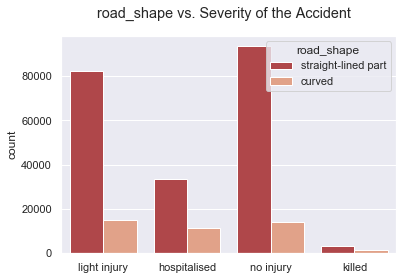

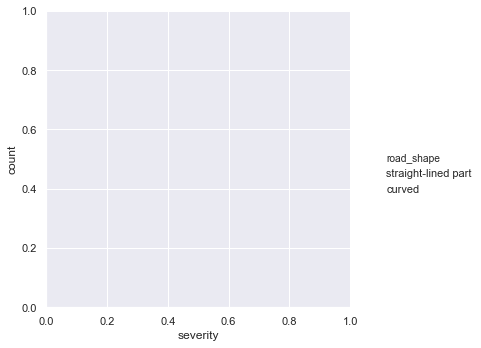

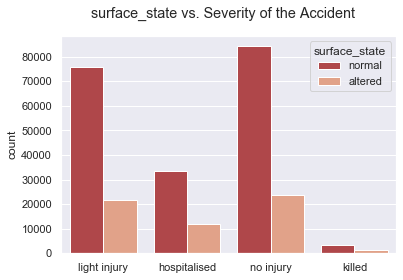

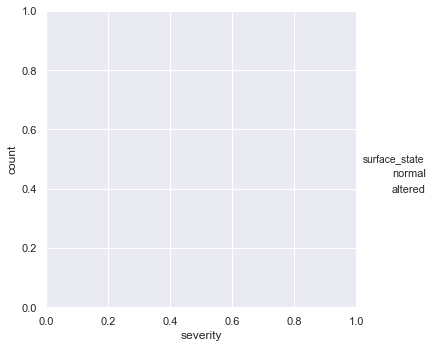

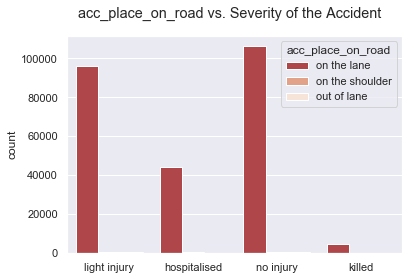

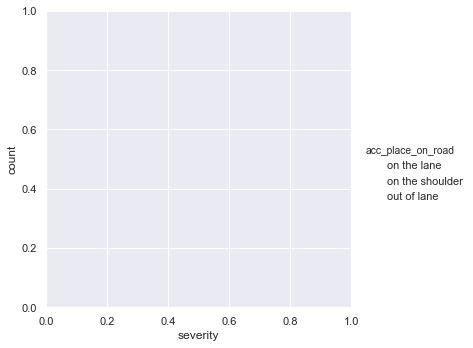

In [33]:
var=list(df.select_dtypes(include='object').columns)
var.remove('severity')
cat_target(var)

In [34]:
#Plotting association between independent categorical features and outcome
#creating function for plots
def counts_plot(var):
    for i in range(len(var)):
        counts_df = df.groupby([var[i], 'severity'])
        counts_df = counts_df['Num_Acc'].count().unstack()
        percents_df = counts_df.T.div(counts_df.T.sum()).T
        
        fig, ax = plt.subplots(figsize=(6,4))
        percents_df.plot(kind="bar", stacked=True, color=['green','red','orange', 'blue'], ax=ax)

        ax.set_xlabel(var[i], fontsize=16)
        ax.set_ylabel("Proportion", fontsize=16)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        percents_df
        fig.suptitle(var[i]+ ' vs. Severity of the Accident');

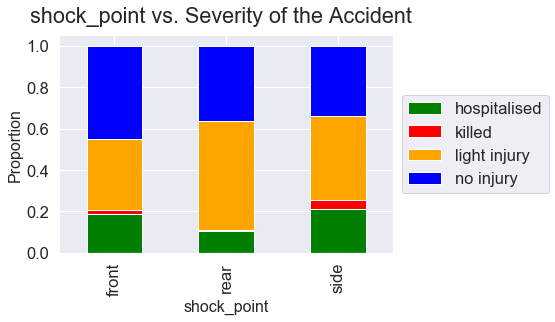

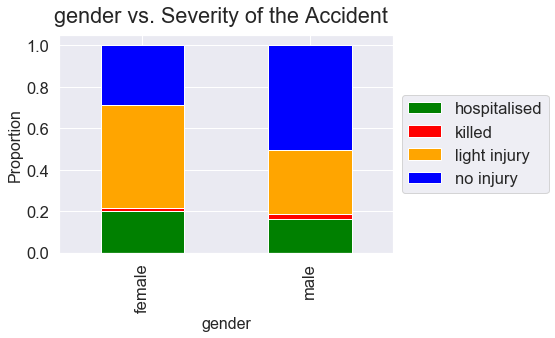

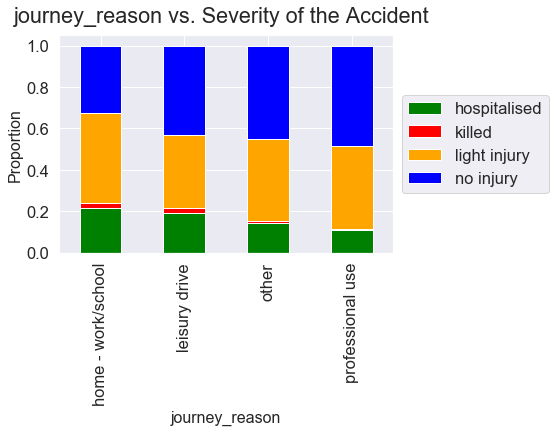

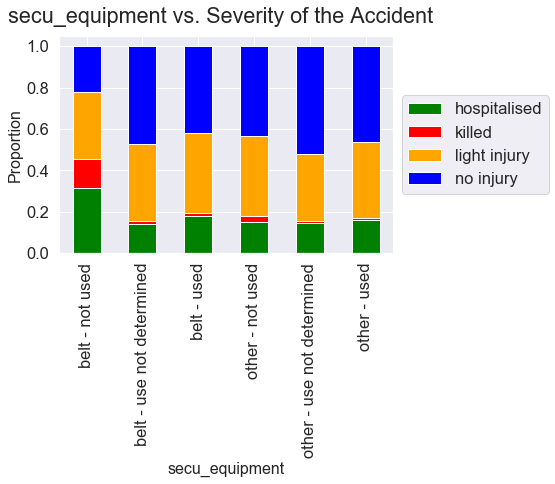

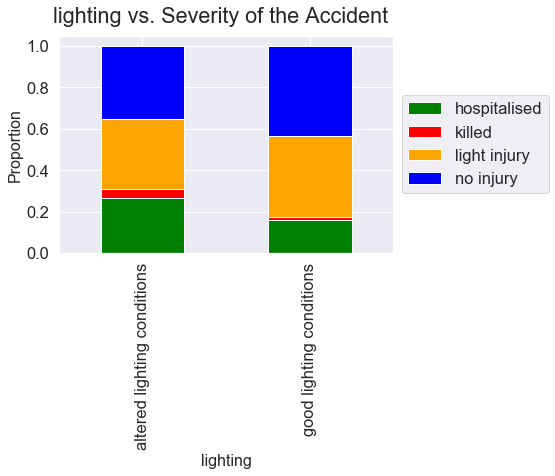

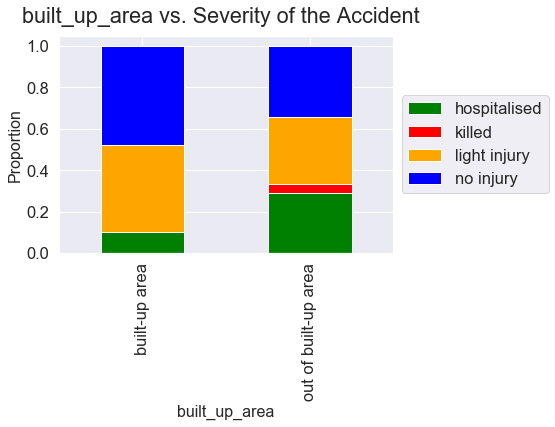

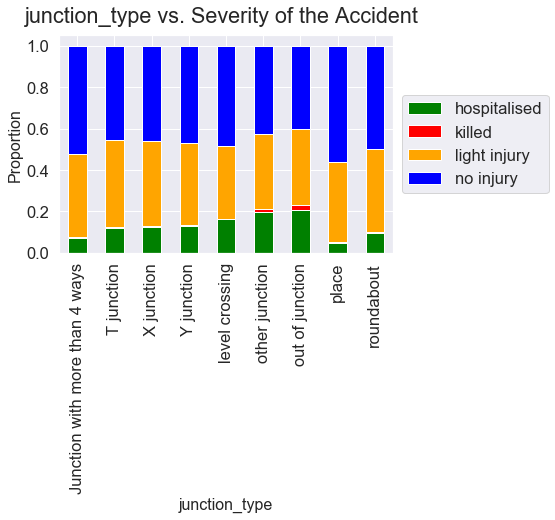

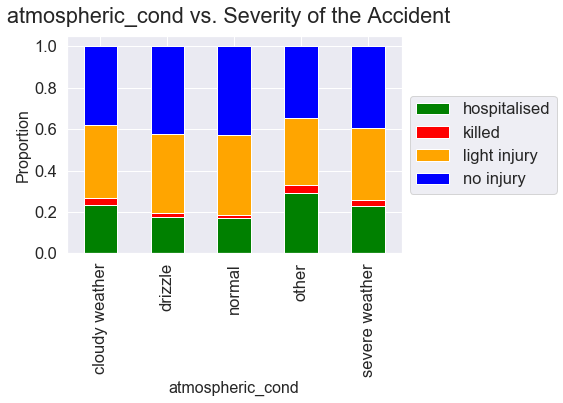

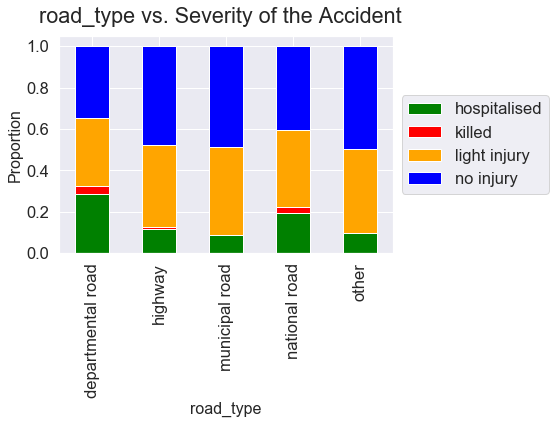

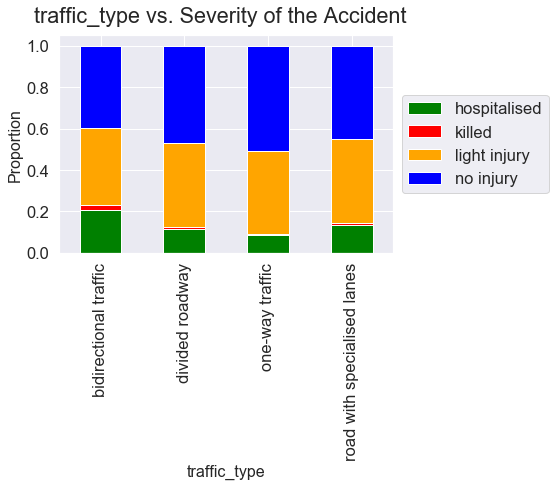

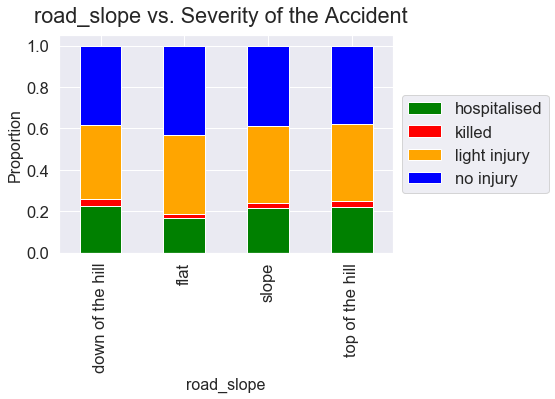

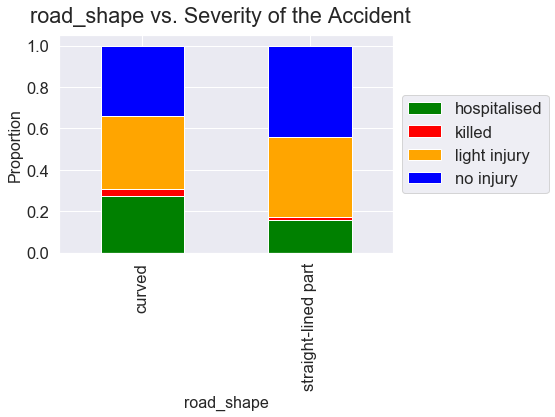

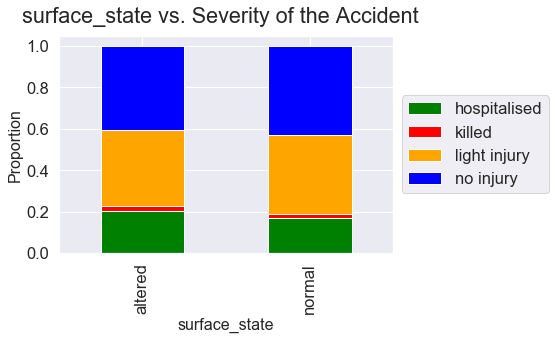

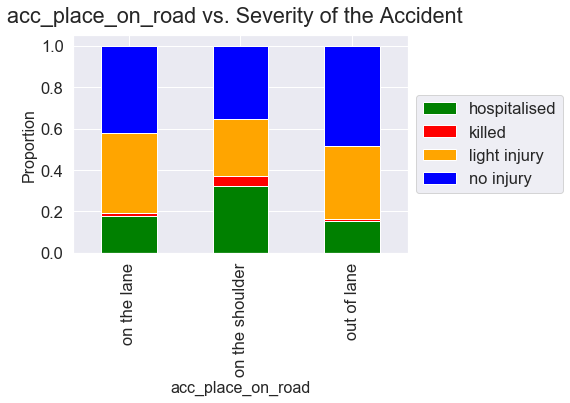

In [36]:
#showing the plots
var=list(df.select_dtypes(include='object').columns)
var.remove('severity')
counts_plot(var)

## Cramer's V test to measure the strength of association between categorical variables

In [15]:
# code from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
#Cramer's V test to measure the strength of association between categorical variables

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [16]:
# building a matrix https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
var2=list(df.select_dtypes(include='object').columns)
data_encoded=df[var2]
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_v(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # rounding value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


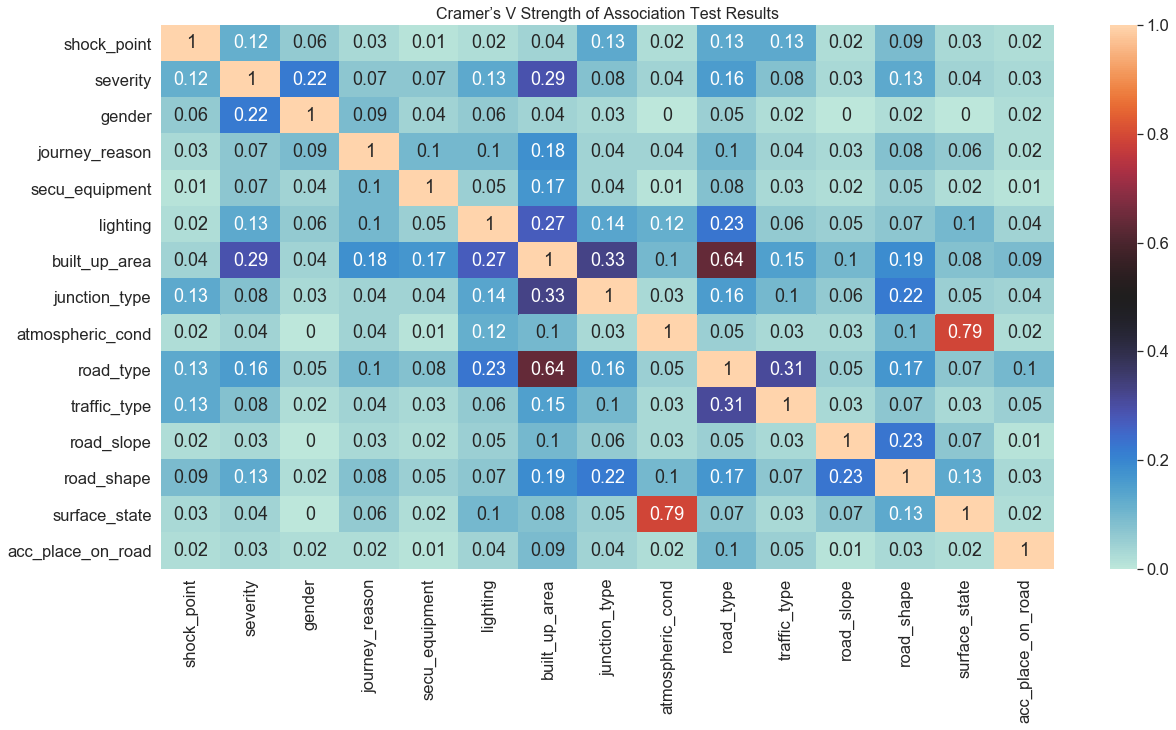

In [18]:
#plotting
plt.figure(figsize=(20,10)) 
sns.set(font_scale=1.5)
sns.heatmap(df2,cmap='icefire',annot=True)
plt.title("Cramer’s V Strength of Association Test Results", fontsize=16)
plt.show()